In [33]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
from keras.backend.tensorflow_backend import set_session
set_session(tf.Session(config=config))
import keras
from keras import backend as K
K.set_image_dim_ordering('tf')
import re
import pandas as pd
from nltk import word_tokenize, pos_tag
import numpy as np
from wordcloud import STOPWORDS



In [34]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,GlobalAveragePooling1D
from keras.layers.embeddings import Embedding

In [35]:
from nltk import pos_tag

In [36]:
data=pd.read_csv('/home/saiaravinds/Sentiment/text.csv')

In [37]:
df_y=data['Is_Response']

In [38]:
df2=df_y

In [39]:
df2[df2=='happy']=1
df2[df2=='not happy']=0


In [299]:
print(data.describe())

        User_ID                                        Description  \
count     38932                                              38932   
unique    38932                                              38932   
top     id17310  We stayed one night on a layover in NYC. It wa...   
freq          1                                                  1   

       Browser_Used Device_Used  Is_Response  
count         38932       38932        38932  
unique           11           3            2  
top         Firefox     Desktop            1  
freq           7367       15026        26521  


In [40]:
y=df2.values

In [41]:
from keras.preprocessing import text
words=[]
for i in range(data.shape[0]):
    words.append(text.text_to_word_sequence(data.iloc[i]['Description'],filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                               lower=True,
                                               split=" "))

In [232]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,CuDNNLSTM,LSTM,CuDNNGRU
from keras.layers import Flatten,Dropout
from keras.layers import Embedding

In [43]:
word_list=list(data.iloc[:]['Description'])

In [77]:
word_list[24145]

"Bid <$----rm-night for a weekend stay using name your own price on priceline for - rooms in a - star in the union square area and got this hotel. I've never used name your own price before but figured this was a good time to start. I was concerned because there were - of us, and the hotel wouldn't pre-book anything when I called them after they had my money. All their connecting rooms connect -K to -D. Nearly all of their -K rooms also have a pullout couch. Their rooms with -D are so small they can not take a rollaway. They told me a rollaway in a -K room would not be a problem. At checkin, they didn't treat me like a priceline deadbeat, they put me in the rooms we needed with no problem. By mistake those rooms didn't have a pullout, so by asking very nicely we were offered a free upgrade to one of the rooms to a minisuite, which was fantastic.\nThe hotel is pretty much at the edge of the Tenderloin, the sketchy part of town - the area to the west and perhaps south is 'iffy'. If that 

In [44]:
len(words)

38932

In [13]:
t=Tokenizer()

In [14]:
t.fit_on_texts(word_list)

In [15]:
vocab_size=len(t.word_index)+1

In [301]:
od1=t1.word_counts

In [303]:
from collections import OrderedDict

In [306]:
h=OrderedDict(sorted(od1.items(), key=lambda t: t[1]))

In [308]:
h1=list(h)

In [ ]:
h2

In [16]:
vocab_size

50579

In [17]:
encoded_docs = t.texts_to_sequences(word_list)

In [94]:
length=[len(i) for i in encoded_docs]

In [96]:
min(length)

2

In [95]:
np.argmin(np.array(length))

14499

In [97]:
encoded_docs[14499]

[3677, 2]

In [99]:
print(list(t1.word_index.keys())[list(t1.word_index.values()).index(2)])

room


In [67]:
y[24145]

1

In [64]:
import matplotlib.pyplot as plt

In [66]:
encoded1=

list

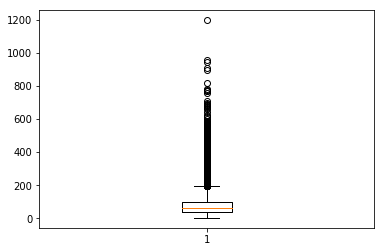

In [100]:
plt.boxplot(length)
plt.show()

In [63]:
encoded_docs[24145]

[2586]

In [280]:
padded_docs = pad_sequences(encoded_docs, maxlen=150, padding='post')
print(padded_docs)

[[   2  329   15 ...    0    0    0]
 [  13 2994  696 ...    0    0    0]
 [  97    1  994 ...    0    0    0]
 ...
 [ 607  368  196 ...    0    0    0]
 [ 105  228  267 ...    0    0    0]
 [ 480 2299 4016 ...    0    0    0]]


In [281]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(padded_docs,y,test_size=0.2,shuffle=True)

In [282]:
ytrain.shape

(31145,)

In [283]:
ytrain=ytrain.astype('int')
ytest=ytest.astype('int')

In [292]:
embeddings_index = dict()
f = open('glove.6B/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [293]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [294]:
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=150, trainable=False)
model.add(e)
#model.add(GlobalAveragePooling1D())
model.add(CuDNNLSTM(100))
#model.add(Dropout(0.5))
#model.add(Dense(4096,activation='relu'))
#model.addd(Dense())
#model.add(Dense(50,activation='elu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 150, 100)          4584000   
_________________________________________________________________
cu_dnnlstm_30 (CuDNNLSTM)    (None, 100)               80800     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 101       
Total params: 4,664,901
Trainable params: 80,901
Non-trainable params: 4,584,000
_________________________________________________________________


In [295]:
#sgd=keras.optimizers.SGD(lr=0.15, momentum=0.5, decay=0.03, nesterov=True)

In [296]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [297]:
model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest),batch_size=100,shuffle=True)

Train on 31145 samples, validate on 7787 samples
Epoch 1/100
31145/31145 [==============================] - 6s 197us/step - loss: 0.6118 - acc: 0.6910 - val_loss: 0.6245 - val_acc: 0.6878
Epoch 2/100
31145/31145 [==============================] - 4s 117us/step - loss: 0.6083 - acc: 0.7015 - val_loss: 0.6145 - val_acc: 0.6947
Epoch 3/100
31145/31145 [==============================] - 4s 114us/step - loss: 0.6146 - acc: 0.6923 - val_loss: 0.6196 - val_acc: 0.6846
Epoch 4/100
31145/31145 [==============================] - 4s 118us/step - loss: 0.6095 - acc: 0.6965 - val_loss: 0.6190 - val_acc: 0.6883
Epoch 5/100
31145/31145 [==============================] - 4s 115us/step - loss: 0.6089 - acc: 0.6974 - val_loss: 0.6115 - val_acc: 0.6899
Epoch 6/100
31145/31145 [==============================] - 4s 116us/step - loss: 0.6113 - acc: 0.6967 - val_loss: 0.6291 - val_acc: 0.6778
Epoch 7/100
31145/31145 [==============================] - 4s 115us/step - loss: 0.6063 - acc: 0.6990 - val_loss: 0.6

In [46]:
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

In [47]:
df1=pd.read_csv('/home/saiaravinds/Sentiment/text.csv')

In [4]:
stopwords

<WordListCorpusReader in '/home/saiaravinds/nltk_data/corpora/stopwords'>

In [86]:
tes1=review_to_words(word_list[24145])

In [87]:
tes1

'bid rm night weekend stay using name price priceline rooms star union square area got hotel never used name price figured good time start concerned us hotel pre book anything called money connecting rooms connect k nearly k rooms also pullout couch rooms small not take rollaway told rollaway k room would not problem checkin treat like priceline deadbeat put rooms needed problem mistake rooms pullout asking nicely offered free upgrade one rooms minisuite fantastic hotel pretty much edge tenderloin sketchy part town area west perhaps south iffy bothers not likely avoid sketchy paying another hotel another area area north east heart downtown sf walk block cable car take fishermans wharf enjoy world beautiful city hotel charges night parking insane even area found best parking jones st night problems jones st area tad sketchy worry issues note flying town would insane rent car travel sf take mass transit instead not drive around sf airport take bart muni whatever'

In [85]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    #review_text = BeautifulSoup(raw_review).get_text() 
    #
    review_text=raw_review
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(k_words)                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [5]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
len(stopwords.words("english"))

179

In [29]:
k_words=stopwords.words("english")

In [30]:
for i in ['not','below','above','down']:
    k_words.remove(i)

In [27]:
k.remove('not')

In [32]:
len(k_words)

175

In [88]:
num_reviews = df1["Description"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( df1["Description"][i] ) )

In [89]:
t1=Tokenizer()

In [90]:
t1.fit_on_texts(clean_train_reviews)

In [91]:
vocab_size=len(t1.word_index)+1

In [92]:
vocab_size

45840

In [93]:
encoded_docs = t1.texts_to_sequences(clean_train_reviews)

In [155]:
endc

[[23, 12], [617]]

In [54]:
encoded_docs

[[2,
  329,
  15,
  1585,
  512,
  1579,
  982,
  818,
  382,
  228,
  879,
  4,
  3,
  3582,
  7,
  813,
  100,
  61,
  53,
  18,
  36,
  93,
  178],
 [13,
  2993,
  696,
  1353,
  1353,
  6,
  25,
  672,
  342,
  422,
  67,
  57,
  660,
  564,
  49,
  193,
  175,
  540,
  864,
  556,
  69,
  49,
  554,
  2,
  1785,
  37,
  42,
  31,
  75,
  287,
  225,
  9,
  300,
  121,
  49,
  32,
  10409,
  757,
  777,
  470,
  980,
  32,
  91,
  1343,
  1100,
  29,
  28,
  1453,
  49,
  4583,
  1042,
  1277,
  3,
  19511,
  95,
  27,
  1757,
  335,
  4143,
  3897,
  87,
  1291,
  580,
  981,
  1091,
  5749,
  465,
  9,
  37,
  3,
  150,
  924,
  6,
  254,
  9,
  218,
  648,
  580,
  683,
  25067,
  274,
  349,
  908,
  1042,
  70,
  580,
  42,
  7902,
  3,
  145,
  649,
  2,
  49,
  9920,
  7,
  4,
  89,
  7,
  3,
  189,
  619],
 [97,
  1,
  993,
  2897,
  61,
  28,
  114,
  47,
  33,
  22,
  215,
  275,
  16,
  602,
  2,
  5382,
  49,
  1653,
  7,
  3,
  97,
  2,
  1487,
  602,
  215,
  7,
  3,


In [ ]:
import pandas as pd

In [168]:
word_test=['i like it.it was nice','it was worst','it was not nice','hell with that place','bad']

In [169]:
endc=t1.texts_to_sequences(word_test)

In [170]:
endc_docs = pad_sequences(endc, maxlen=70, padding='post')
print(endc_docs)

[[  23   12    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 617    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3   12    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 

In [174]:
for i,j in zip(model.predict(xtest),ytest):
    print(i, j)

[0.50224996] 1
[0.98582864] 1
[0.8351947] 1
[0.98489237] 1
[0.01382362] 0
[0.9847991] 1
[0.94515616] 1
[0.9931456] 1
[0.9919579] 1
[0.9639203] 1
[0.48103738] 1
[0.06821585] 0
[0.32057333] 0
[0.16131553] 0
[0.01736487] 0
[0.8669601] 1
[0.31051925] 1
[0.01601994] 0
[0.8868687] 1
[0.4258392] 1
[0.9932387] 1
[0.05257886] 0
[0.99387556] 1
[0.60905695] 1
[0.3389878] 0
[0.9891284] 1
[0.01174296] 0
[0.01399435] 0
[0.8405217] 0
[0.9790652] 1
[0.18890539] 0
[0.68000484] 1
[0.23453659] 0
[0.01804444] 0
[0.33325934] 1
[0.9720772] 1
[0.05030675] 0
[0.9944722] 1
[0.9879556] 1
[0.98455817] 1
[0.89186335] 1
[0.48709473] 1
[0.40612316] 0
[0.10838434] 1
[0.99278635] 1
[0.96807635] 1
[0.9830169] 1
[0.74668247] 0
[0.48447862] 1
[0.9902574] 1
[0.71488553] 1
[0.18068054] 1
[0.94202316] 1
[0.60567397] 0
[0.98321587] 1
[0.99318075] 1
[0.92965204] 1
[0.2376318] 0
[0.36682945] 0
[0.9854255] 1
[0.9371043] 1
[0.23978956] 0
[0.24623257] 0
[0.3543352] 0
[0.78371555] 1
[0.10318112] 0
[0.98234564] 1
[0.01157403] 0
[0

[0.9810526] 0
[0.93467605] 1
[0.08326555] 0
[0.17925528] 0
[0.21451168] 1
[0.01869291] 0
[0.14971654] 1
[0.23895061] 0
[0.98929054] 1
[0.7279672] 1
[0.9578991] 1
[0.38240808] 0
[0.9632346] 1
[0.84149766] 1
[0.9314358] 1
[0.40049592] 1
[0.7313053] 1
[0.9919309] 1
[0.96953684] 1
[0.7377643] 1
[0.87597233] 1
[0.15280043] 0
[0.44300434] 1
[0.9773096] 1
[0.9877813] 1
[0.9408276] 1
[0.5244248] 0
[0.9738166] 1
[0.9820625] 1
[0.99152803] 1
[0.8824297] 1
[0.24631713] 0
[0.4912396] 1
[0.03132883] 0
[0.9636612] 1
[0.15042984] 1
[0.4678342] 0
[0.58601725] 1
[0.9743484] 1
[0.0495306] 0
[0.49027517] 1
[0.01263913] 0
[0.94115174] 1
[0.12446132] 0
[0.9599999] 1
[0.889917] 1
[0.42913955] 1
[0.9538186] 1
[0.23634844] 0
[0.45724273] 1
[0.7856256] 1
[0.99066263] 1
[0.96441966] 1
[0.9565363] 1
[0.0109371] 0
[0.9808966] 1
[0.94200665] 1
[0.07437199] 0
[0.87777096] 1
[0.01765371] 0
[0.270705] 1
[0.9935894] 1
[0.9946713] 1
[0.96629626] 1
[0.9094287] 1
[0.4160445] 0
[0.5338541] 1
[0.9312952] 1
[0.99038106] 1
[

[0.413485] 0
[0.10099854] 0
[0.08081997] 0
[0.9933543] 1
[0.7738065] 1
[0.9321983] 0
[0.22569591] 1
[0.93308854] 1
[0.58223176] 1
[0.2083211] 0
[0.82048017] 1
[0.15836512] 1
[0.02652334] 0
[0.33379233] 0
[0.7523073] 0
[0.9940362] 1
[0.24202909] 1
[0.55699205] 1
[0.93413466] 1
[0.02683749] 0
[0.42643514] 1
[0.99289614] 1
[0.66394144] 1
[0.6588835] 1
[0.22876205] 0
[0.09207413] 0
[0.45297483] 1
[0.99085355] 1
[0.9185423] 1
[0.31150293] 1
[0.39759186] 0
[0.7892717] 1
[0.99396163] 1
[0.08714797] 0
[0.2804669] 0
[0.31147742] 0
[0.9491906] 1
[0.9650293] 0
[0.98187447] 1
[0.8886255] 1
[0.4597286] 1
[0.87690115] 1
[0.9939176] 1
[0.21795091] 0
[0.01211721] 0
[0.08638989] 0
[0.06980605] 1
[0.97087] 1
[0.96452004] 1
[0.6114501] 0
[0.88644516] 1
[0.12706064] 0
[0.97582924] 1
[0.9928235] 1
[0.01961259] 0
[0.04186255] 0
[0.96567976] 1
[0.10151511] 0
[0.99286807] 1
[0.9068039] 1
[0.8330715] 1
[0.8685654] 1
[0.9377429] 1
[0.6967141] 0
[0.05923331] 0
[0.31471795] 1
[0.9729743] 1
[0.23446871] 0
[0.82194

[0.07101971] 1
[0.8669591] 1
[0.75443244] 1
[0.98314697] 1
[0.84195966] 1
[0.01231199] 0
[0.5300912] 1
[0.96391076] 1
[0.78341955] 1
[0.0862597] 0
[0.96512735] 1
[0.35331947] 0
[0.7464032] 1
[0.02590589] 0
[0.98715836] 1
[0.9579094] 1
[0.10011769] 0
[0.51753896] 1
[0.9871503] 1
[0.9138003] 1
[0.9942151] 1
[0.5700498] 1
[0.09689588] 0
[0.993334] 1
[0.67480206] 1
[0.6130774] 1
[0.9299075] 1
[0.34086514] 1
[0.33294785] 1
[0.9931705] 1
[0.67611927] 1
[0.02372192] 0
[0.17349777] 0
[0.92452943] 1
[0.9936399] 1
[0.95349] 1
[0.9822191] 1
[0.97660613] 1
[0.96563554] 1
[0.9647638] 1
[0.93744737] 1
[0.94552577] 1
[0.77412194] 1
[0.01218789] 0
[0.90917337] 1
[0.01394007] 0
[0.87634754] 1
[0.13971168] 0
[0.2749847] 0
[0.24804984] 1
[0.26942694] 0
[0.43111885] 1
[0.80396] 1
[0.644029] 1
[0.76883036] 1
[0.97065645] 1
[0.7361438] 1
[0.9864299] 1
[0.03141192] 1
[0.08966662] 0
[0.2735839] 0
[0.6472314] 0
[0.95212716] 1
[0.35957766] 0
[0.9147586] 1
[0.9934198] 1
[0.9863687] 1
[0.5892795] 0
[0.12949322] 0

[0.9941797] 1
[0.34093398] 1
[0.9450301] 1
[0.01223835] 0
[0.8722723] 1
[0.4632319] 1
[0.9723777] 1
[0.9566882] 1
[0.96724766] 1
[0.9511001] 1
[0.54708326] 1
[0.919427] 1
[0.84308285] 1
[0.84074897] 0
[0.13415293] 1
[0.96792275] 1
[0.63937825] 0
[0.03530905] 0
[0.8974766] 1
[0.99010086] 1
[0.8845986] 1
[0.09531482] 0
[0.03911206] 0
[0.9931161] 1
[0.8988495] 1
[0.96550536] 1
[0.9742143] 1
[0.9299269] 1
[0.6912256] 0
[0.9275143] 1
[0.90708417] 1
[0.96198165] 1
[0.9930373] 1
[0.23963666] 0
[0.894892] 1
[0.13504086] 0
[0.01579986] 0
[0.98443663] 1
[0.09633517] 0
[0.9901725] 1
[0.29185554] 0
[0.96304697] 1
[0.82565826] 1
[0.98410636] 1
[0.01643646] 0
[0.98456925] 1
[0.9928352] 1
[0.870214] 0
[0.80470484] 0
[0.67027646] 1
[0.47406304] 0
[0.93856317] 1
[0.97796226] 1
[0.3121878] 0
[0.9838521] 1
[0.9939302] 1
[0.8805659] 1
[0.83250564] 0
[0.22133708] 0
[0.2969891] 0
[0.39828262] 1
[0.21040617] 1
[0.9946457] 1
[0.9945986] 1
[0.87030834] 1
[0.90958285] 1
[0.91106784] 1
[0.95928085] 1
[0.37639573

[0.73995715] 0
[0.75237876] 1
[0.72466797] 1
[0.9595113] 1
[0.98587924] 1
[0.5567003] 1
[0.762124] 1
[0.9615029] 1
[0.75641274] 1
[0.46572] 0
[0.88199437] 1
[0.06492548] 0
[0.2700502] 0
[0.8193476] 1
[0.36880952] 1
[0.97078854] 1
[0.02742173] 1
[0.01073635] 0
[0.04049447] 0
[0.4722225] 1
[0.26102176] 1
[0.5748713] 1
[0.946365] 1
[0.8290306] 1
[0.7683543] 1
[0.3614896] 1
[0.8425798] 1
[0.04757975] 0
[0.9847845] 1
[0.37918267] 1
[0.85114574] 1
[0.99359107] 1
[0.9294804] 1
[0.8980159] 1
[0.99105144] 1
[0.98683006] 1
[0.73884314] 1
[0.84695834] 0
[0.0143576] 0
[0.9935953] 1
[0.5983112] 0
[0.54261374] 0
[0.99447316] 1
[0.01233297] 0
[0.86293256] 1
[0.99374783] 1
[0.9933821] 1
[0.8313618] 1
[0.9093183] 1
[0.91040754] 1
[0.05662782] 0
[0.8415695] 1
[0.98111063] 1
[0.74922687] 1
[0.6077192] 1
[0.05499099] 0
[0.2627256] 1
[0.40560502] 0
[0.38548774] 0
[0.4745022] 0
[0.99182844] 1
[0.93325144] 1
[0.3450454] 0
[0.9932193] 1
[0.1447081] 0
[0.9386333] 1
[0.99066204] 1
[0.02077045] 0
[0.9829494] 1
[

[0.03126264] 0
[0.8604007] 1
[0.84413266] 1
[0.09226119] 0
[0.8862656] 1
[0.3819774] 0
[0.62353593] 0
[0.3312588] 1
[0.9629831] 1
[0.97296023] 1
[0.9758975] 1
[0.6601856] 1
[0.90683055] 1
[0.9043145] 1
[0.82699835] 0
[0.9361202] 1
[0.02849705] 0
[0.14254977] 1
[0.9925234] 1
[0.01341722] 0
[0.9646412] 1
[0.8764864] 1
[0.19033404] 0
[0.4389611] 1
[0.99189854] 1
[0.5726912] 1
[0.8973953] 1
[0.9918874] 1
[0.9605949] 1
[0.58168405] 0
[0.2558757] 0
[0.93948436] 1
[0.9957236] 1
[0.01198903] 0
[0.990171] 1
[0.9797354] 1
[0.9868803] 1
[0.79499495] 1
[0.88886666] 0
[0.75122374] 1
[0.99537647] 1
[0.98838776] 0
[0.90513635] 1
[0.9461765] 1
[0.99449784] 1
[0.9925647] 1
[0.9857846] 1
[0.9685231] 1
[0.08511653] 0
[0.89793724] 1
[0.65418184] 1
[0.13160875] 0
[0.6540621] 1
[0.11040004] 1
[0.09045934] 0
[0.9925706] 1
[0.7499217] 1
[0.8837085] 1
[0.6240023] 1
[0.74882907] 1
[0.13908711] 0
[0.95884854] 1
[0.9161084] 1
[0.05480712] 0
[0.9911848] 1
[0.9749137] 1
[0.9934901] 1
[0.48790038] 0
[0.817783] 1
[0.

[0.6996509] 1
[0.09460092] 1
[0.7894859] 0
[0.9890282] 1
[0.01602422] 0
[0.5904731] 1
[0.1089244] 1
[0.6251147] 1
[0.9084729] 1
[0.07725483] 0
[0.92126685] 1
[0.8355485] 1
[0.17132336] 1
[0.4565497] 1
[0.6274126] 1
[0.8428636] 1
[0.12392529] 0
[0.86911064] 1
[0.33131507] 0
[0.01067135] 0
[0.58872265] 0
[0.95608056] 1
[0.98495054] 1
[0.2734296] 1
[0.21067533] 0
[0.21859139] 0
[0.37645298] 0
[0.99091935] 1
[0.09236046] 1
[0.59112287] 0
[0.99486023] 1
[0.98976934] 0
[0.8925106] 1
[0.96167123] 1
[0.93426204] 1
[0.9953367] 1
[0.54384553] 1
[0.4121629] 0
[0.6636709] 1
[0.03692019] 0
[0.6663514] 1
[0.20854561] 1
[0.8030659] 1
[0.78857523] 0
[0.90563625] 1
[0.987394] 1
[0.2420887] 0
[0.17816636] 0
[0.9655985] 1
[0.9896773] 1
[0.64544535] 0
[0.61232245] 1
[0.74040216] 0
[0.98564273] 1
[0.22895782] 1
[0.99310607] 1
[0.6935912] 1
[0.31390435] 1
[0.0173844] 0
[0.63208336] 1
[0.6914668] 1
[0.7697209] 1
[0.6502415] 1
[0.0904538] 0
[0.8141531] 1
[0.03755817] 0
[0.9974279] 1
[0.99420244] 1
[0.9846948]